**- Partition Lamuto**

In [1]:
def partitionlamuto(list1,start,end):
    piv = list1[end]
    i=start-1
    j=i+1
    while(j<end):
        if list1[j] <= piv:
            list1[i+1],list1[j]=list1[j],list1[i+1]
            i+=1
        j+=1 #if its bigger than pivot DO NOTHING
    list1[i+1],list1[end] = list1[end],list1[i+1]
    return i+1


**- Partition 2**

In [2]:
def partitiondeux(list1,start,end):
    piv = list1[end]
    inf=start
    sup=end-1
    while(inf<=sup):
        if list1[inf] <= piv:
            inf+=1
        else:
            list1[inf],list1[sup]=list1[sup],list1[inf]
            sup-=1
    list1[end],list1[sup+1]=list1[sup+1],list1[end]
    return sup+1


**- Tri Rapide**

In [3]:
def triRapide(list1,d,f):
    if d<f:
        pivot=partitionlamuto(list1,d,f)
        triRapide(list1,d,pivot-1)
        triRapide(list1,pivot+1,f)

In [4]:
import random

n=10
li=[]
def reinit(N):
    li.clear()
    for i in range(N):
        li.append(random.randint(0,10000))

reinit(n)
print(li)

[1435, 8514, 1555, 7366, 5571, 268, 8464, 1199, 436, 1536]


In [5]:
triRapide(li,0,n-1)
print(li)

[268, 436, 1199, 1435, 1536, 1555, 5571, 7366, 8464, 8514]


In [6]:
from time import time

tailles=[10,100,1000,10000,50000]

trimoyenTaille=[]
for tay in tailles:
    moyenT=0
    for i in range(10):
        reinit(tay)
        debut=time()
        triRapide(li,0,tay-1)
        fin=time()
        moyenT+=fin-debut
    trimoyenTaille.append(moyenT/10)

print(trimoyenTaille)

[6.079673767089844e-06, 8.425712585449218e-05, 0.0013786792755126954, 0.015535855293273925, 0.0971421480178833]


In [7]:
from time import time

tailles = [10, 100, 1000]

temps_croissant = []
for tay in tailles:
    moyenT = 0
    for i in range(10):
        reinit(tay)
        li.sort()
        debut = time()
        triRapide(li, 0, tay-1)
        fin = time()
        moyenT += fin - debut
    temps_croissant.append(moyenT / 10)

print("ordre croissant:", temps_croissant)

temps_decroissant = []
for tay in tailles:
    moyenT = 0
    for i in range(10):
        reinit(tay)
        li.sort(reverse=True)
        debut = time()
        triRapide(li, 0, tay-1)
        fin = time()
        moyenT += fin - debut
    temps_decroissant.append(moyenT / 10)

print("ordre decroissant:", temps_decroissant)

temps_repetition = []
for tay in tailles:
    moyenT = 0
    for i in range(10):
        li2 = [232] * tay
        debut = time()
        triRapide(li2, 0, tay-1)
        fin = time()
        moyenT += fin - debut
    temps_repetition.append(moyenT / 10)

print("repeating value:", temps_repetition)

ordre croissant: [8.249282836914063e-06, 0.0005713462829589844, 0.055124664306640626]
ordre decroissant: [5.125999450683594e-06, 0.00032808780670166013, 0.03788690567016602]
repeating value: [6.771087646484375e-06, 0.0005094766616821289, 0.05981433391571045]


**Observation**: 
Le code renvoi une erreur, la complexite est tres grande car on essaye d'executer le tri rapide sur une liste deja trier, ce qui rend la complexite (pire des cas) O(n^2)  

**- Quick Sort**

quick select est comme quick sort mais au lieu de faire le tri seulement apres chaque partition on connait l'indice final du pivot ce qui nous donne le rang de l'element par rapport a toute la liste.

In [8]:
def QuickSelect(list1, start, end, k):
    if start == end:
        return list1[start]
    piv = partitionlamuto(list1, start, end)
    if piv == k:
        return list1[piv]
    elif k < piv:
        return QuickSelect(list1, start, piv - 1, k)
    else:
        return QuickSelect(list1, piv + 1, end, k)

In [9]:
# Test QuickSelect
test_list = [3, 7, 1, 9, 2, 8, 5]
print("Original list:", test_list)

# Find minimum (k=0)
li_copy = test_list.copy()
print("Minimum (k=0):", QuickSelect(li_copy, 0, len(li_copy)-1, 0))

# Find median (k=n//2)
li_copy = test_list.copy()
print("Median (k=3):", QuickSelect(li_copy, 0, len(li_copy)-1, 3))

# Find maximum (k=n-1)
li_copy = test_list.copy()
print("Maximum (k=6):", QuickSelect(li_copy, 0, len(li_copy)-1, 6))

# Verify with sorted list
print("Sorted list for verification:", sorted(test_list))

Original list: [3, 7, 1, 9, 2, 8, 5]
Minimum (k=0): 1
Median (k=3): 5
Maximum (k=6): 9
Sorted list for verification: [1, 2, 3, 5, 7, 8, 9]


In [10]:
tailles = [10, 100, 1000, 10000, 50000]
temps_quickselect = []

for n in tailles:
    moyenT = 0
    for i in range(10):
        li = [random.randint(0, 1000000) for _ in range(n)]
        k = n // 2 
        debut = time()
        QuickSelect(li, 0, n - 1, k)
        fin = time()
        moyenT += fin - debut
    temps_quickselect.append(moyenT / 10)

print(temps_quickselect)


[4.029273986816406e-06, 3.893375396728516e-05, 0.000488901138305664, 0.004320955276489258, 0.01620821952819824]


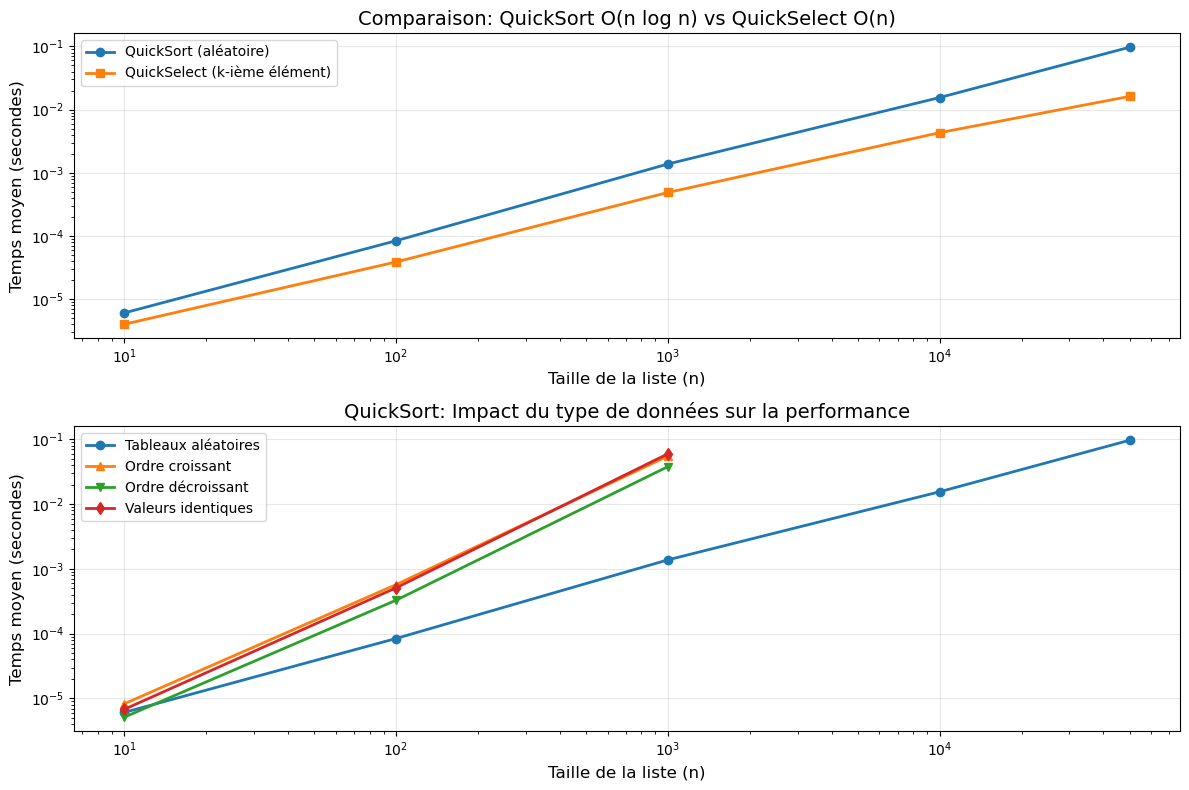


QuickSort (aléatoire): [6.079673767089844e-06, 8.425712585449218e-05, 0.0013786792755126954, 0.015535855293273925, 0.0971421480178833]
QuickSort (croissant): [8.249282836914063e-06, 0.0005713462829589844, 0.055124664306640626]
QuickSort (décroissant): [5.125999450683594e-06, 0.00032808780670166013, 0.03788690567016602]
QuickSort (répétition): [6.771087646484375e-06, 0.0005094766616821289, 0.05981433391571045]
QuickSelect: [4.029273986816406e-06, 3.893375396728516e-05, 0.000488901138305664, 0.004320955276489258, 0.01620821952819824]

Ratio QuickSort/QuickSelect:
  n=   10: 1.51x plus rapide avec QuickSelect
  n=  100: 2.16x plus rapide avec QuickSelect
  n= 1000: 2.82x plus rapide avec QuickSelect
  n=10000: 3.60x plus rapide avec QuickSelect
  n=50000: 5.99x plus rapide avec QuickSelect


In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))

# Graph 1: QuickSort vs QuickSelect
plt.subplot(2, 1, 1)
plt.plot(tailles, trimoyenTaille, marker='o', label='QuickSort (aléatoire)', linewidth=2)
plt.plot(tailles, temps_quickselect, marker='s', label='QuickSelect (k-ième élément)', linewidth=2)
plt.xlabel('Taille de la liste (n)', fontsize=12)
plt.ylabel('Temps moyen (secondes)', fontsize=12)
plt.title('Comparaison: QuickSort O(n log n) vs QuickSelect O(n)', fontsize=14)
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)
plt.xscale('log')
plt.yscale('log')

# Graph 2: QuickSort sur différents types de tableaux
plt.subplot(2, 1, 2)
# Use only the first 3 sizes for the sorted tests
tailles_test = [10, 100, 1000]
plt.plot(tailles, trimoyenTaille, marker='o', label='Tableaux aléatoires', linewidth=2)
plt.plot(tailles_test, temps_croissant, marker='^', label='Ordre croissant', linewidth=2)
plt.plot(tailles_test, temps_decroissant, marker='v', label='Ordre décroissant', linewidth=2)
plt.plot(tailles_test, temps_repetition, marker='d', label='Valeurs identiques', linewidth=2)
plt.xlabel('Taille de la liste (n)', fontsize=12)
plt.ylabel('Temps moyen (secondes)', fontsize=12)
plt.title('QuickSort: Impact du type de données sur la performance', fontsize=14)
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)
plt.xscale('log')
plt.yscale('log')

plt.tight_layout()
plt.show()

print(f"\nQuickSort (aléatoire): {trimoyenTaille}")
print(f"QuickSort (croissant): {temps_croissant}")
print(f"QuickSort (décroissant): {temps_decroissant}")
print(f"QuickSort (répétition): {temps_repetition}")
print(f"QuickSelect: {temps_quickselect}")
print(f"\nRatio QuickSort/QuickSelect:")
for i, taille in enumerate(tailles):
    ratio = trimoyenTaille[i] / temps_quickselect[i] if temps_quickselect[i] > 0 else 0
    print(f"  n={taille:5d}: {ratio:.2f}x plus rapide avec QuickSelect")